<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# PATIENT SURVIVAL PREDICTION



<img src="images/quote_start.jpg">

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1-Hypothesis)
    - [3.2 Workflow](#3.2-Workflow)
    - [3.3 Methods](#3.3-Methods)
    - [3.4Analysis](#3.4-Analysis)
    - [3.5 Results](#3.5-Results)
- [4. Implementation (optional)](#4.-Implementation-(optional))
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract

Brief description (300 words or less) of your analysis and results. 

## Introduction

Introduce your project. Describe all the processes you followed to solve the problem.

## 1. The problem

The dataset is sourced from open domain and is about data related to a hospital in Greenland. It is the responsibility of Hospital Administration to provide efficient and timely patient care to ensure that the individual concerned recovers from the illness completely. The Hospital admistration is seeking answers for improving the standard of medical care by addressing related factors. The data is related to a particular department in the Hospital where mortality rate is beyond acceptable levels. Accordingly, it is understood that towards this, the data related to patient has been obtained from multiple SQL tables in the database and collated. The historical data collates information regarding demographics of the patient as well as treatment and medical condition and includes a binary variable which indicates whether the patient survived at the end of 12 months of care. The attributes  which affect the patient survival in a significant way can also be flagged.

The **Objective** of the Project is to analyse the factors given in the dataset and predict chance of survival of patient at the end of 12 months of treatment. 

[Back to top](#Table-of-contents)

## 2. Purpose of the study

Healthcare is one of the domains where Machine Learning has contributed immensely. Most common health care use case are automated medical billing, clinical decision support and development of clinical care guidelines. The proposed project for Patient Survival prediction can be categorized into the third element of developing patient care systmes. There are considerable number of Deep Learning Models which analyse medical images and assist the Doctors in diagnosis of medical condition. The purpose of this study is more genric as it intended to identify factors affecting the survival of patient over a period of time in a Hospital environment. Given certain attributes related to patient medical condition as well as his treatment partculars, the proposed model is intended to predict survival probability of the patient. The focus is provide optimum care to patient so that he recovers fully. The project outcome will help Hospital admnistration in identifying patient who are risk ans well identfy critical attributes and put efforts to improve them for improving the patient survival records

**SOME CAVEATS ON APPLICATION OF ML IN HEALTHCARE**

The article at refernce(2) has brought out  that application of ML in predicting healthcare status of patient should be done with lot of care as it requires lot of domain expertise. Some of the factors brought out by the author is need to understand whether this problem can be predicted using ML insufficent data related to one patient ( say we have Blood Pressure of the patient . But BP can vary for a patient over time and just having one datapoint is insufficent we tend to apply algorithm based on metrics like accuracy,precision etc without clear understanding of working of algorithm under the hood as well as adequate domain experience The issues brought out in the article are noted and flagged , however being a academic project the exercise is undertaken with available data and information available in open domain

[Back to top](#Table-of-contents)

## 3. Project Description

The Project scope of study includes analyse the historical data related to patient medical condition and develop a Supervised Machine Learning Model which can predict whether a patient will survive or not at the end of 12 months of hospital care. The project will also make a user interface for the hopital administration to input the patient medical conditions and obtain probability of survival from the ML model. It is intended to upload the solution on cloud/server for easy acess.

[Back to top](#Table-of-contents)

### 3.1 Hypothesis

What are the hypothesis that drive your project?

Once the problem statement is finalized, we move on to the hypothesis generation part. Here, we try to point out the factors/features that can help us to solve the problem at hand.

[Back to top](#Table-of-contents)

### 3.2 Workflow

- Define the problem 
- Map the system 
- Define suitable metrics 
- Exploratory Data Analysis and Pre-processing
- Select modeling tools 
- Implement model  
- Evaluate model 
- Deploy the final model 

[Back to top](#Table-of-contents)

**DESCRIPTION OF DATASET**

The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
Survived_1_year == 1, implies that the patient survived after 1 year of treatment

The features in the dataset are as follows :-

-ID_Patient_Care_Situation: Care situation of a patient during treatment

-Diagnosed_Condition: The diagnosed condition of the patient


-ID_Patient: Patient identifier number

-Treatment_with_drugs: Class of drugs used during treatment

-Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

-Patient_Age: Age of the patient

-Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

-Patient_Smoker: If the patient was a smoker or not

-Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

-Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

*As the patient data is also very sensitive, only limited demographic information related to the patient is available*

In [2]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as color

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [3]:
#importing the csv file and read into a dataframe
patient = pd.read_csv('dataset/patient_survival.csv')
print(color('OVERVIEW OF FIRST FEW ROWS OF DATASET....','blue',attrs=['bold']))
display(patient.head())

OVERVIEW OF FIRST FEW ROWS OF DATASET....


,Unnamed: 0,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
# size of dataframe
patient.shape

(23097, 19)

We need to examine the distribution of target column to see if it is imbalanced and in case it is imbalanced we need to address the same. The evaluation metrics have to be decided accordingly

1    14603
0     8494
Name: Survived_1_year, dtype: int64

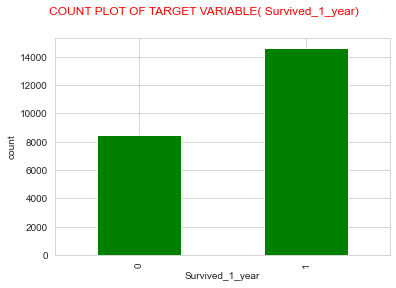

In [5]:
#check the distribution of target values
display(patient['Survived_1_year'].value_counts())
patient['Survived_1_year'].value_counts().plot.bar(color='g')
plt.xlabel('Survived_1_year')
plt.ylabel('count')
plt.figtext(0.47, 0.96, "COUNT PLOT OF TARGET VARIABLE( Survived_1_year)", fontsize='large', color='r', ha ='center')
plt.show()

Scrutiny of target column reveals 63& patients have survived and 37% patients have not survived. There are around 14000 individuals survived as against 8500 individuals who did not survive after 1 year. The data is not imbalanced to a great extent such as 90:10 where model can develop serious bias towards surviving class. 

The target columns is not imbalanced and hence **would not require** any treatment for correcting class imbalance by oversampling/undersampling/SMOTE techniques etc

The dataset has 23097 rows and 19 columns

**ADDRESSING THE ISSUE OF DATA LEAKEGE**

Data leakege(reference 3) is the problem of model getting biased from information outside the training data. The model developed should be able to predict on unseen data . One of the ways data leakge can take place is info leakege from test set during training . When we are doing EDA and preprocessing (like normalising) there are chances of distribution of test data getting into model training phase and this can create a bias. One approach is to split your training dataset into train and validation sets, and store away the validation dataset. Once you have completed your modeling process and actually created your final model, evaluate it on the validation dataset.

It is intended to follow this approach by splitting the data into training and validation set initally . The validation set would be used at the end for one time validation of model.

**DEFINING EVALUATION METRICS**

The evaluation metric for the model would be F1 metric and AUC-ROC curve

### SPLIT THE DATASET INTO TRAINING AND TEST DATASET

In [6]:
#separating X and y from the dataset
X = patient.drop('Survived_1_year',axis=1)
y = patient['Survived_1_year']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.15,stratify=y,random_state=42)

In [8]:
#looking at shape of train and validation data
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((19632, 18), (19632,), (3465, 18), (3465,))

The train data has 19632 rows and validation data has 3465 rows. To preserve the proportion of target column in both train and valid , stratify parameter has been used.

### EDA AND DATA PRE-PROCESSING

we shall examine each attribute in detail as well as understand insights from the dataset using EDA as well as visualisation tools. We shall restrict EDA only to train data and keep validation dataset for validation purposes at the end.

In [9]:
#look at train data and columns
X_train.head()

,Unnamed: 0,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
8098,8098,23837,13,8589,DX3 DX5,57,28.077127,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
21211,21211,6756,36,5369,DX2,2,19.784911,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
12024,12024,8476,16,557,DX1 DX5,0,21.440244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
16529,16529,29717,20,3035,DX3 DX5,33,18.282131,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4344,4344,5742,50,7291,DX2 DX3,24,23.857636,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
#look at columns and datatype
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19632 entries, 8098 to 3100
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19632 non-null  int64  
 1   ID_Patient_Care_Situation  19632 non-null  int64  
 2   Diagnosed_Condition        19632 non-null  int64  
 3   Patient_ID                 19632 non-null  int64  
 4   Treated_with_drugs         19624 non-null  object 
 5   Patient_Age                19632 non-null  int64  
 6   Patient_Body_Mass_Index    19632 non-null  float64
 7   Patient_Smoker             19632 non-null  object 
 8   Patient_Rural_Urban        19632 non-null  object 
 9   Patient_mental_condition   19632 non-null  object 
 10  A                          18566 non-null  float64
 11  B                          18566 non-null  float64
 12  C                          18566 non-null  float64
 13  D                          18566 non-null  f

In [11]:
# we can drop Unnamed: 0 columns as it is same as index column
X_train.drop('Unnamed: 0',axis=1,inplace=True)

**data Pre-processing(1)- Drop 'unnamed column'**

#### NUMERIC COLUMNS EDA

In [12]:
X_train.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

- For univariate analysis of numeric columns, we have box plots as well as histograms to visualise the data. 

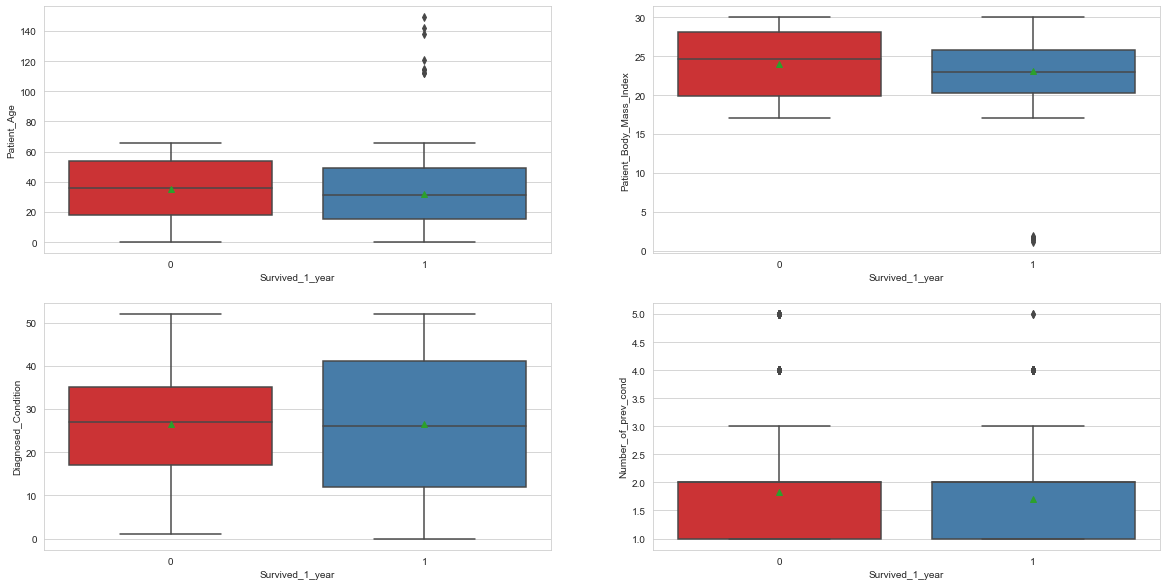

In [13]:
numeric_columns=['Patient_Age','Patient_Body_Mass_Index','Diagnosed_Condition','Number_of_prev_cond']
f=plt.figure(figsize=(20,10))
i=1
for col in numeric_columns:
    f.add_subplot(2,2,i)
    sns.boxplot(y=col,data=X_train,x=y_train,showmeans=True,palette='Set1')
    i+=1
plt.show()

A univariate plot shows the data and summarizes its distribution. 

**Plot1**  (Age)

- the mean and meadian of age variable is more or less equal for survived and not survived class(for survived it is marginally 
  lower. 
- The age for survived has a few extreme values on the higher side
- the spread of data seems to be similar for both classes.

**Plot2** (BMI)
-  The mean /median BMI of Not Survived class is higher than that of Survived column. The mean value of BMI for Not Survived is    around 25 which is overweight category. The mean value of Survived is around 22 which is considered more healthier. Howver   
   the maximum value is same for both categories. 
- The range of BMI for Not survived is higher 
- The survived has a BMI value which is very small , which looks like an error in data and needs to be corrected.
- BMI as a factor leading to the individual Not surviving or in other words BMI as a factor for survival is flagged.

**plot3** (Diagonised Condition)
- The Diagonized Condition mean for Not Survived is marginally higher than that of Survived category
- The range of values for survived is higher 
- Max and min values for both categories are similar

**plot4** (Number of prev condition)
- the plot looks similar for Survived and Not Survived
- The data is right skewed and few outliers are visible

In [14]:
# Looking at descriptive statistics of numeric columns
display(X_train[numeric_columns].describe().T)

,count,mean,std,min,25%,50%,75%,max
Patient_Age,19632.0,33.213070,19.541484,0.0000,16.000000,33.000000,50.000000,149.000000
Patient_Body_Mass_Index,19632.0,23.452505,3.801194,1.0893,20.196148,23.386462,26.783362,29.999579
Diagnosed_Condition,19632.0,26.469132,15.024445,0.0000,13.000000,27.000000,40.000000,52.000000
Number_of_prev_cond,18566.0,1.749542,0.770076,1.0000,1.000000,2.000000,2.000000,5.000000


- For Age the mean and median are more or less similar . hence the data does not have much skew. 
- Min and max value of Age needs examination (looks like error). The higher value of std dev could be because of these values
- For BMI our earlier observations hold good. A few lower values may need further cleaning
- For Diagnosed condition , maan and meadian values do not differ much . Hence there is not much skew in data

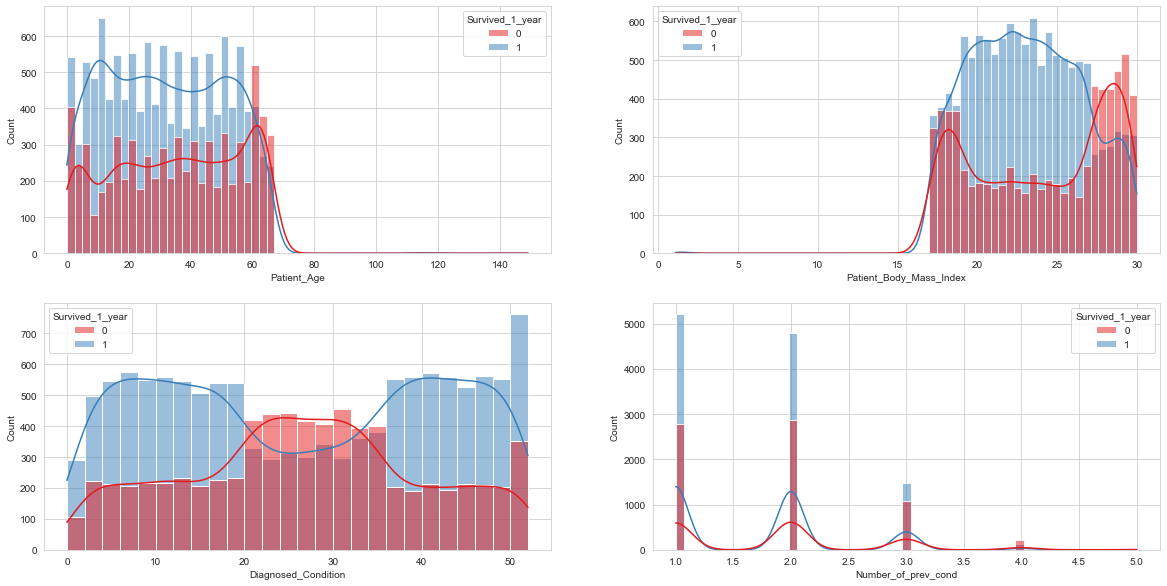

In [15]:
# Examining the distribution of numeric variables
f=plt.figure(figsize=(20,10))
i=1
for col in numeric_columns:
    f.add_subplot(2,2,i)
    sns.histplot(data=X_train,x=col,hue=y_train,kde=True,palette='Set1')
    i+=1
plt.show()

- The Number of prev condition is discrete data. 
- Age is right skewed while BMI is left skewed

As a next step , Looking at Numeric Columns one by one to address the missing values and outliers

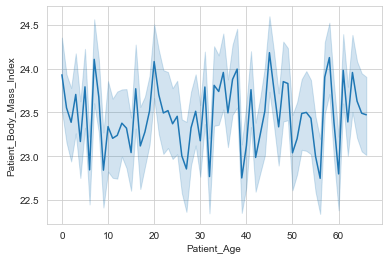

In [90]:
sns.lineplot('Patient_Age','Patient_Body_Mass_Index',data=X_train)
plt.show()

- There is no clear trend emerging here between BMI and age 

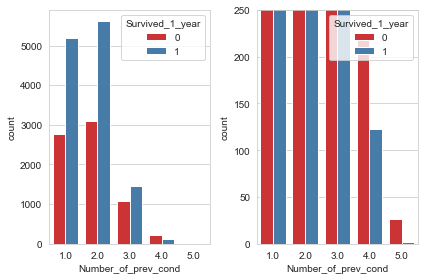

In [100]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2) 
sns.countplot(X_train['Number_of_prev_cond'],hue=y_train,palette='Set1',ax=ax1)
sns.countplot(X_train['Number_of_prev_cond'],hue=y_train,palette='Set1',ax=ax2)
plt.ylim(0,250)
plt.tight_layout()
plt.show()

- Most of the patients have number of prev condition 1 or 2 . 
- Patients with condition 4 and 5 are mostly not survived . Patients with Cond 4 and 5 needs very focused care

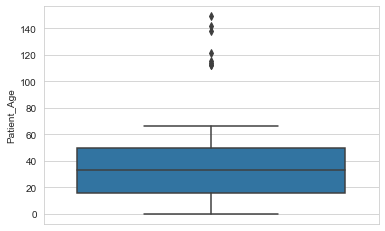

In [16]:
#lets look at boxplot of entire Age data
sns.boxplot(y=X_train['Patient_Age'])
plt.show()

In [17]:
# IQR for Age variable
Q1 = X_train['Patient_Age'].quantile(0.25)
Q3 = X_train['Patient_Age'].quantile(0.75)
IQR_age = Q3 - Q1
print(IQR_age)

34.0


In [18]:
#examining outliers on the lower side
X_train[X_train['Patient_Age'] < (Q1 - 1.5 * IQR_age)] 

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond


- There are no outliers on the lower side for Age variable

In [19]:
Age_out = X_train[X_train['Patient_Age'] > (Q3 + 1.5 * IQR_age)] # columns with age values > (Q3 + 1.5 * IQR)
Age_out

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21705,33013,0,12514,NaN,121,1.0893,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19123,33002,0,12503,NaN,115,1.8199,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


On the extreme values for Age , the value ranges from 112-149..Removal of these data may have an adverse effect on info loss. Their corresponding BMI values also looks erroneous. If you disregard the above values, max age is 66 and examining the data for age = 66

In [20]:
age_66 = X_train[X_train['Patient_Age'] ==66] # a sub dataframe for age = 66
age_66.shape 

(284, 17)

- There are 284 rows with age = 66 . We will use this age and corresponding mean BMI to impute rows of age beyond Q3_1.5*IQR_age

In [21]:
#mean BMI for age group
age_66_meanBMI = age_66['Patient_Body_Mass_Index'].mean()
age_66_meanBMI

23.472638216024613

In [22]:
#assign age=66 and corresponding mean BMI to outliers
index_age_out = list(Age_out.index)
for index in index_age_out:
    X_train['Patient_Age'][index] = 66
    X_train['Patient_Body_Mass_Index'][index] = age_66_meanBMI

In [23]:
X_train[X_train['Patient_Age'] > (Q3 + 1.5 * IQR_age)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond


The extreme values on the higher side have been addressed

**Dataprocessing (2) - Impute outlier age values to max age and corresponding BMI to mean BMI for age=66**

In [24]:
#X_train[X_train['Patient_Age'] == 0]
#Need to address lower values <5 ?

In [25]:
#looking at missing values
X_train['Patient_Age'].isnull().sum()

0

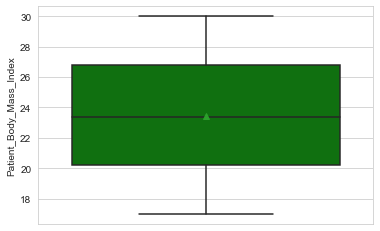

In [26]:
# Looking at next numeric attribute BMI
# boxplot for BMI
sns.boxplot(y=X_train['Patient_Body_Mass_Index'],color='g',showmeans=True)
plt.show()

In [27]:
# the lower area of BMI(underweight) is from 18.5
X_train['Patient_Body_Mass_Index'].describe()

count    19632.000000
mean        23.461454
std          3.775288
min         17.000336
25%         20.200412
50%         23.392495
75%         26.783362
max         29.999579
Name: Patient_Body_Mass_Index, dtype: float64

In [28]:
X_train['Patient_Body_Mass_Index'].isnull().sum()

0

The minimum and max values of BMI seems to be fine . There are no null values. 

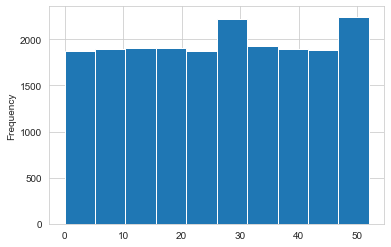

In [29]:
# Looking at next numeric variable 
X_train['Diagnosed_Condition'].plot.hist()
plt.show()

In [30]:
X_train['Diagnosed_Condition'].isnull().sum()

0

- The variable is sort of uniformly distributed having frequency similar for all the 10 buckets(minor variation for 30-40 and 40-50). There are no null values for this dataset.

In [31]:
# Examining the numeric variable Number_of_prev_cond
X_train['Number_of_prev_cond'].isnull().sum()

1066

In [32]:
X_train['Number_of_prev_cond'].describe()

count    18566.000000
mean         1.749542
std          0.770076
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: Number_of_prev_cond, dtype: float64

we will use median value of 2 to impute the missing values

In [33]:
median_prev_cond = X_train['Number_of_prev_cond'].median()
X_train['Number_of_prev_cond'].fillna(median_prev_cond,inplace=True)

**Data pre-processing (3) Number of prev_cond to be imputed by median_prev-cond**

In [34]:
X_train['Number_of_prev_cond'].isnull().sum()

0

Before moving into Categorical variables, examining the correlation between numeric variables

In [35]:
numeric_columns

['Patient_Age',
 'Patient_Body_Mass_Index',
 'Diagnosed_Condition',
 'Number_of_prev_cond']

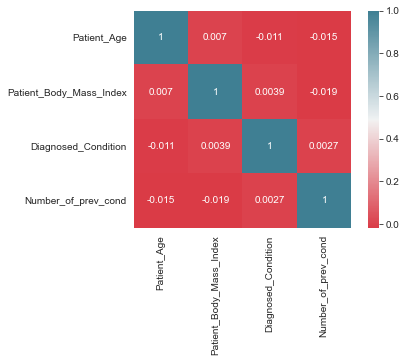

In [36]:
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(X_train[numeric_columns].corr(),
           cmap=colormap,
           annot=True,
           square=True)
plt.show()

There are no numeric attributes having a strong correlation between themselves causing interaction among attributes

Examining the categorical attributes one by one

In [37]:
#checking for missing values in cat columns
X_train.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
8098,23837,13,8589,DX3 DX5,57,28.077127,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
21211,6756,36,5369,DX2,2,19.784911,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
12024,8476,16,557,DX1 DX5,0,21.440244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [38]:
X_train.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1066
B                            1066
C                            1066
D                            1066
E                            1066
F                            1066
Z                            1066
Number_of_prev_cond             0
dtype: int64

In [39]:
# looking at Treated_with_drugs 
X_train['Treated_with_drugs'].value_counts()

DX6                     7303
DX2                     1641
DX5                     1615
DX1                     1567
DX3                     1562
DX4                     1520
DX1 DX2                  389
DX3 DX4                  382
DX4 DX5                  370
DX3 DX5                  356
DX1 DX3                  352
DX2 DX5                  352
DX2 DX4                  340
DX1 DX5                  339
DX1 DX4                  333
DX2 DX3                  329
DX1 DX2 DX5               88
DX1 DX3 DX5               85
DX1 DX2 DX4               85
DX1 DX2 DX3               84
DX3 DX4 DX5               79
DX2 DX3 DX5               79
DX2 DX4 DX5               75
DX2 DX3 DX4               72
DX1 DX4 DX5               70
DX1 DX3 DX4               65
DX1 DX3 DX4 DX5           21
DX2 DX3 DX4 DX5           20
DX1 DX2 DX3 DX4           19
DX1 DX2 DX4 DX5           16
DX1 DX2 DX3 DX5           13
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

There are 6 types of drugs being admistered to the patients,viz, DX1 DX2 DX3 DX4 DX5 DX6
Most of the patients are being admnistered DX6 alone , while some of the patients get combination of drugs

In [40]:
mode_drugs= X_train['Treated_with_drugs'].mode()[0]# mode value for treated with drugs
mode_drugs

'DX6'

In [41]:
 X_train['Treated_with_drugs'].fillna(mode_drugs,inplace=True) #impute with mode values

In [42]:
 X_train['Treated_with_drugs'].isnull().sum()

0

No null values for  X_train['Treated_with_drugs']..

**Data preprocessing(3) ---impute  ['Treated_with_drugs'] with mode_drugs**

There are 1066 missing values in the columns A-Z which is linked to number of prev condition

In [43]:
# getting the index values of missing values for A to Z of prev condition
A_missing_index = set(X_train[X_train.A.isnull()].index)
B_missing_index = set(X_train[X_train.B.isnull()].index)
C_missing_index = set(X_train[X_train.C.isnull()].index)
D_missing_index = set(X_train[X_train.D.isnull()].index)
E_missing_index = set(X_train[X_train.E.isnull()].index)
F_missing_index = set(X_train[X_train.F.isnull()].index)
Z_missing_index = set(X_train[X_train.Z.isnull()].index)
u =set.intersection(A_missing_index,B_missing_index,C_missing_index,D_missing_index,E_missing_index,F_missing_index,Z_missing_index)

In [44]:
# length of intersection of all missing values from A ,B , C, D , E,F,Z 
len(u)

1066

We see that len of index is equal to missing values in all columns from A to Z. Since all attributes A to Z are missing it is very difficult to impute the missing values

In [45]:
u = list(u)
prev_count_missing_val = []
for index in u:
    prev_count_missing_val.append(X_train['Number_of_prev_cond'][index])

In [46]:
prev_count_missing_val = pd.Series(prev_count_missing_val)
prev_count_missing_val.value_counts()

2.0    1066
dtype: int64

we see that all missing values for prev_condition A-Z has 'Number of prev cond' as 2.0. Lets see if any pattren is there corresponsing to this value for imputing

In [47]:
#create a sub dataframe where values of 'Number_of_prev_cond' is 2.0
prev_cond_2 = X_train[X_train['Number_of_prev_cond']==2.0]

In [48]:
#looking at how columns A-Z are distributed for sub dataframe
col_list = ['A','B','C','D','E','F','Z']
for col in col_list:
    display(prev_cond_2[col].value_counts())

1.0    7146
0.0     513
Name: A, dtype: int64

0.0    6395
1.0    1264
Name: B, dtype: int64

0.0    6056
1.0    1603
Name: C, dtype: int64

0.0    7017
1.0     642
Name: D, dtype: int64

1.0    4237
0.0    3422
Name: E, dtype: int64

0.0    7233
1.0     426
Name: F, dtype: int64

0.0    7659
Name: Z, dtype: int64

- if we look at the distribution A and E (1 value_counts of A and E are max)are mostly filled column for 'Number_of_prev_cond'=2. we can use this a impute value

- so we fill all missing 1066 rows with A=1 and E=1 and rest B,C,D,F,Z =0

In [49]:
#imputing as per above condition
X_train['A'].fillna(1.0,inplace=True)
X_train['B'].fillna(0,inplace=True)
X_train['C'].fillna(0,inplace=True)
X_train['D'].fillna(0,inplace=True)
X_train['E'].fillna(1.0,inplace=True)
X_train['F'].fillna(0,inplace=True)
X_train['Z'].fillna(0,inplace=True)

In [50]:
X_train.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

- There are no missing values in X_train

**Data pre-processing(4) - Impute columns A-Z**

- As there are no more missing values in train data, we shall carry out EDA of categorical columns

In [51]:
#segregating cat columns from total columns
total_columns = list(X_train.columns)
for col in numeric_columns:
    total_columns.remove(col) #remove numeric cols already defined 
cat_columns = total_columns # assign truncated total columns to ca-columns

In [52]:
# checking no of unique vallues in each cat attribute
for col in cat_columns:
    print('No of unique categories in',col,'  ',X_train[col].nunique())

No of unique categories in ID_Patient_Care_Situation    19632
No of unique categories in Patient_ID    9930
No of unique categories in Treated_with_drugs    32
No of unique categories in Patient_Smoker    3
No of unique categories in Patient_Rural_Urban    2
No of unique categories in Patient_mental_condition    1
No of unique categories in A    2
No of unique categories in B    2
No of unique categories in C    2
No of unique categories in D    2
No of unique categories in E    2
No of unique categories in F    2
No of unique categories in Z    2


- The ID_patient_care_situation corresponds to unique value in each row of X_train. 
- The patient ID gets repeated . So it is possible that patient gets treatment (idscharged and readmitted) multiple times 
- Patient_mental_condition has only one category . hence we can delete the column as it can't provide any valuable info
- Patient Rural/Urban as well as prev_cond A-Z is binary

In [53]:
X_train.Patient_mental_condition.value_counts()

Stable    19632
Name: Patient_mental_condition, dtype: int64

In [54]:
#dropping Patient_mental_condition column
X_train.drop('Patient_mental_condition',axis=1,inplace=True)

**Note : Data preprocessing(6)-Drop 'Patient_mental_condition'**

In [55]:
# looking at distribution of treated_with_drugs
X_train['Treated_with_drugs'].unique()

array(['DX3 DX5 ', 'DX2 ', 'DX1 DX5 ', 'DX2 DX3 ', 'DX3 DX4 ', 'DX6',
       'DX3 ', 'DX1 ', 'DX2 DX4 ', 'DX1 DX4 DX5 ', 'DX4 ', 'DX1 DX3 ',
       'DX2 DX5 ', 'DX1 DX2 DX3 ', 'DX5 ', 'DX1 DX2 ', 'DX4 DX5 ',
       'DX1 DX4 ', 'DX1 DX2 DX3 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX3 DX5 ',
       'DX1 DX3 DX4 ', 'DX2 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ', 'DX1 DX2 DX5 ',
       'DX1 DX2 DX3 DX4 ', 'DX2 DX3 DX4 DX5 ', 'DX2 DX3 DX5 ',
       'DX3 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX2 DX4 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

- We can split the treated with columns similar to one hot encoding as the column is combination of drugs

In [56]:
drugs = X_train['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
8098,0,0,1,0,1,0
21211,0,1,0,0,0,0
12024,1,0,0,0,1,0
16529,0,0,1,0,1,0
4344,0,1,1,0,0,0


In [57]:
X_train = pd.concat([X_train,drugs],axis=1)
X_train.head(3)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,...,E,F,Z,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
8098,23837,13,8589,DX3 DX5,57,28.077127,YES,RURAL,1.0,0.0,...,0.0,1.0,0.0,2.0,0,0,1,0,1,0
21211,6756,36,5369,DX2,2,19.784911,NO,RURAL,1.0,0.0,...,1.0,0.0,0.0,2.0,0,1,0,0,0,0
12024,8476,16,557,DX1 DX5,0,21.440244,NO,RURAL,1.0,0.0,...,1.0,0.0,0.0,2.0,1,0,0,0,1,0


In [58]:
# we can drop Treated_with_drugs column
X_train.drop('Treated_with_drugs',axis=1,inplace=True)

**Note: Data preprocessing - create dummies columns and drop orginal column for 'Treated_with_drugs'**

In [59]:
# examining the 'Patient_smoker' column
X_train['Patient_Smoker'].value_counts()

NO            11254
YES            8370
Cannot say        8
Name: Patient_Smoker, dtype: int64

- we have a category 'cannot say' but with very low count. we can reduce the attribute to binary column

- we will use mode of the column , viz, NO to replace the 'cannot say' category

In [60]:
X_train['Patient_Smoker'] = X_train['Patient_Smoker'].replace({'Cannot say':'NO'})

**Date pre-processing replace 'cannot say' in smoker to NO**

In [61]:
X_train['Patient_Smoker'].value_counts()

NO     11262
YES     8370
Name: Patient_Smoker, dtype: int64

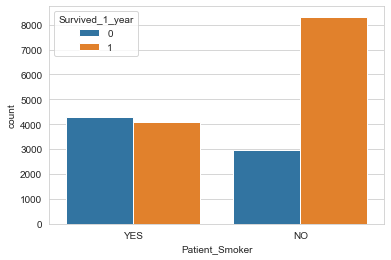

In [62]:
# examining the data distribution of smoker column
sns.countplot(X_train['Patient_Smoker'],hue=y_train)
plt.show()

- Number smokers who have survuved and not survived are almost same count

- It is seen that % of Non smokers who have survived compared to Not survived is significant. 

- smoking as expected could be a factor affecting probability of survival

In [63]:
# examining the rural/urban distribution
X_train['Patient_Rural_Urban'].value_counts()

RURAL    13753
URBAN     5879
Name: Patient_Rural_Urban, dtype: int64

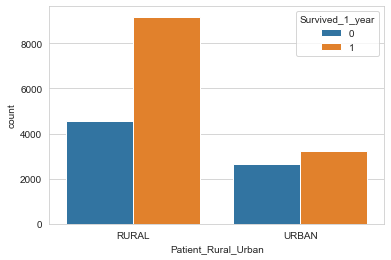

In [64]:
sns.countplot(X_train['Patient_Rural_Urban'],hue=y_train)
plt.show()

- The % patients who have survived from Rural background is higher
- The count of patients who have survived and Not Survived from Urban areas are more or less same(Survived is marginally higher)

Lets have a look whether our hypothesis of Smoker and Urban areas adversely affecting probability of survival by a chi-square hypothesis test

#### CHI SQUARE HYPOTHESIS TEST FOR INDEPENDENCE

In [65]:
#hypothesis for significance in association between smoker and survived
import scipy.stats as st

pd.crosstab(X_train['Patient_Smoker'],y_train)

Survived_1_year,0,1
Patient_Smoker,,
NO,2945,8317
YES,4275,4095


In [66]:
table = [[2945,8317],[4275,4095]]
st.chi2_contingency(table)

(1281.8798705082054,
 9.794925757092706e-281,
 1,
 array([[4141.79095355, 7120.20904645],
        [3078.20904645, 5291.79095355]]))

The output of above method from scipy.stats is (a) computed_chi square stat (b) p value (c) degree of freedom (c) expected values

It is seen that p value is extremely small indicative of the fact that Null hypothesis (no association between variables) can be rejected . *There is an association between two variables*

In [67]:
# checking association between Rural/Urban and Survived
pd.crosstab(X_train['Patient_Rural_Urban'],y_train)

Survived_1_year,0,1
Patient_Rural_Urban,,
RURAL,4571,9182
URBAN,2649,3230


In [68]:
table = [[4571,9182],[2649,3230]]
st.chi2_contingency(table)

(247.05742891865316,
 1.1375267824868701e-55,
 1,
 array([[5057.89832926, 8695.10167074],
        [2162.10167074, 3716.89832926]]))

- Here as well the p Value obtained is extremely small . hence we conclude that we reject Null Hypothesis and there is sufficent data to prove that there is an assciation between Rural/Urban and survived .

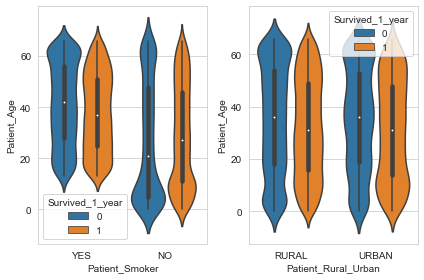

In [69]:
#Violin plot for “Age” vs. “Patient_smoker” and “Age” vs. “Patient_Rural_urban” grouped by “Survived”.
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.violinplot(x='Patient_Smoker', y='Patient_Age',hue=y_train, data=X_train,ax=ax1)
sns.violinplot(x='Patient_Rural_Urban', y='Patient_Age',hue=y_train, data=X_train,ax=ax2)
plt.tight_layout()
plt.show()

- The patient who are smokers and not survived count has a mode at around 60. This is age group of smokers we need too watch to improve survived count
- The above category of patient age group are from both urban and rural , but count from rural is marginally high
- Even though Non smokers (evidently) count of not survived in lower age group has a mode indicative of higher count. This needs further evaluation

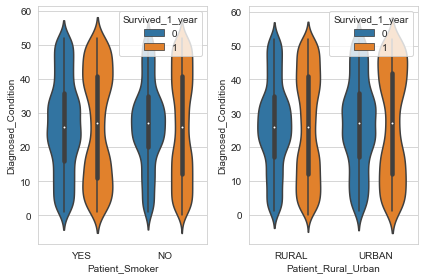

In [75]:
#Factorplot for “smoker” vs. “Diag condition” grouped by “Survived” and 'patient_rural_urban' vs 'Dig condition' by 'survived'
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.violinplot(y='Diagnosed_Condition' , x ='Patient_Smoker',hue =y_train,data = X_train,ax=ax1) 
sns.violinplot(y='Diagnosed_Condition' , x ='Patient_Rural_Urban',hue =y_train,data = X_train,ax=ax2) 
plt.tight_layout()
plt.show()

- Patients who are smokers and did not survive have a considerable count for Diagnosed_condition between 15-35
- Simlar range for patients from rural background
- Urban patients have the Diagonized condition count higher for values around 8 and around 45(bi modal)

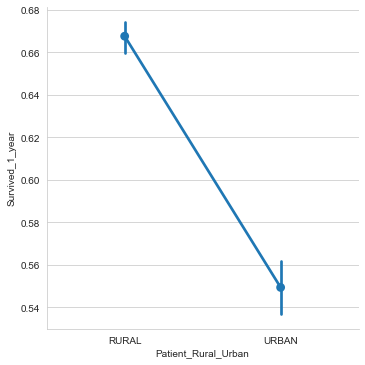

In [78]:
#Factorplot for “rural_urban” vs. “Survived”.
sns.factorplot(x ='Patient_Rural_Urban', y =y_train,data = X_train) 
plt.show()

- The survival and not survived for rural and urban have their error line not overlapping idicative of statistically significant difference
- The patients from rural areas have better chance of survival

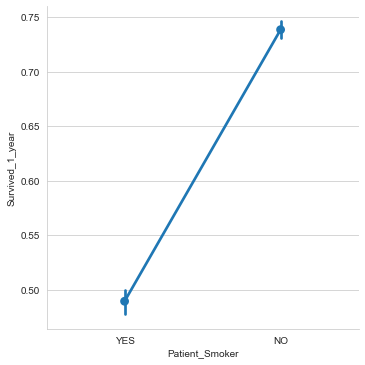

In [81]:
#Factorplot for “smoker” vs. “Survived”.
sns.factorplot(x ='Patient_Smoker', y =y_train,data = X_train) 
plt.show()

- The The survival and not survived for smoker and non smoker have their error line not overlapping indicative of statistically significant difference
- Mean survived for smoker is considerably lower indicative of a factor for determining survived

In [82]:
#using one hot encoding to convert cat columns to numeric
X_train = pd.get_dummies(X_train,columns=['Patient_Smoker','Patient_Rural_Urban'])

 **Note : Data Pre-processing - ohe for Patient_Smoker	Patient_Rural_Urban columns**

In [83]:
print(X_train.ID_Patient_Care_Situation.nunique())     # nunique() gives you the count of unique values in the column
print(X_train.Patient_ID.nunique())

19632
9930


- As discussed earlier , ID_Patient_Care_Situation is a randomely generated number and will not get repeated in the future for prediction. However,the patient ID has some repetitions indicative of same patient coming back for same or some other tratement. The detais may vary in that case. We shall keep this attribute for the time being

In [84]:
#dropping 'ID_Patient_Care_Situation'
X_train.drop('ID_Patient_Care_Situation',axis=1,inplace=True)

**Note : Data pre-processing - drop column ID_Patient_Care_Situation**

## FEATURE ENGINEERING -


- Close scrutiny of attributes of training data reveals the patient is being trated with different type of drugs DX1,DX2,...DX6
- we have captured the type of drugs being treated for the patient in the attributes. However if is seen that the patient may be treated with more than one drugs. The number of drugs being admnistered to the patient will be captured in a separete attribute
- The patient ID has been classified as selected feature and we will tell the model that it is categorical feature rather than continuous variable

In [85]:
# create a column no of treatment drugs which is sum of columns DX1..DX6 
X_train['No_of_treatment_drugs'] = X_train['DX1']+X_train['DX2']+ X_train['DX3']+X_train['DX4']+X_train['DX5']+X_train['DX6']

In [106]:
# Patient ID to cat column
X_train['Patient_ID'] = X_train['Patient_ID'].astype('int')

In [107]:
X_train.head(3)

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,...,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,No_of_treatment_drugs
14859,4,7071,0,22.232827,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,1,0,1,0,1
22171,49,5819,22,29.855100,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,1,0,1
11664,2,7649,19,19.220911,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,1


- all columns are numeric now 


### MODEL BUILDING

### 3.3 Methods

What mathematical and computational methods are you using?

[Back to top](#Table-of-contents)

- The project is a classification problem after one year of treatment,as the target column 'Survived_1_year' has two values 0 - means the patient did not survive after one year of treatment, 1 - means the patient survived after one year of treatment. We will use classification models for the problem solution



- While there are large number of ML libraries which are used for classification problems, limitation in terms of computation power and academic nature of the current project, a set of typical ML algorithms have been used for the current project.
- I have used following ML models in the current problem solving:-

  (a) Logistic Regression : The Logistic regression is a linear model for classification problem. The model uses a logit curve(s-curve ) to establish probability of each class . This being workhorse of classification problem like Linear Regression will give us good baseline model
  
  (b) DecisionTreeClassifier : This is a tree based algorithm which decides the flow of decision based on information at each node. 
  
  (c) KNN Model : The KNN algorithm assumes that similar things exist in close proximity. Based on distances between data points the model predicts a new datapoint to either 0 or 1 class. 
  
  (d) Random Forest Classifier :  Random Forests grows many classification trees(multiple decision trees called bagging method). To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest).
  
  (e) XGBoost Classifier : XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. While RF uses bagging method , boosting method works by improving the  weak learners using the gradient descent architecture.
  
  (f) LightGBM classifier : LightGBM is a gradient boosting framework that uses tree based learning algorithms. Both LightGBM and xgboost utilise histogram based split finding in contrast to sklearn which uses GBM.Hence it is quite fast in compuation and has good predictive power.
  
  (g) Catboost Classifier : “CatBoost” name comes from two words “Category” and “Boosting”.“Boost” comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. It can also return very good result with relatively less data, unlike DL models that need to learn from a massive amount of data.

- - Before building the model , we further divide the train data in train and test data for training and testing our model. The validation dataset we will use for final validation

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

- In the first iteration we will use all the attributes and basic ML model and look at the results. Subsequently further iterations with crossfold validation and hyperparameter tuning along with feature selection

In [109]:
#inspect size of train and valid dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15901, 23), (1767, 23), (15901,), (1767,))

## Iteration No 1 (Basic Model)

In [110]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

In [111]:
import time
start = time.time() #start of the block timer
#model building with basic models
def basic_model_building(model,X_train,y_train,X_test,y_test):
    ''' This function takes in a model and train and test dataset
        and returns model, train and test accuracy score 
        for a classification problem'''
    clf = model
    clf.fit(X_train,y_train) #fit the model
    y_train_pred = clf.predict(X_train) #prediction of trg set
    y_pred = clf.predict(X_test) #prediction of test set
    train_score = metrics.accuracy_score(y_train,y_train_pred) #trg accuracy
    test_score  = metrics.accuracy_score(y_test,y_pred) #test accuracy
    f1_score = metrics.f1_score(y_test,y_pred) #f1 score
    test_auc_roc = metrics.roc_auc_score(y_test,y_pred) # auc_roc_score
    
    return train_score,test_score,f1_score,test_auc_roc

In [112]:
# define a list of models and model_names
models = [LogisticRegression(max_iter = 1000),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),
          GaussianNB(),RandomForestClassifier(n_estimators=100),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=0)]

model_names = ['LogisticRegression','DecisionTree','KNN','Naive_Bayes','RandomForest','XGB','LGBM','catboost']
#create empty list for storing model specific metrics
Training_accuracy =[]
Testing_accuracy =[]
Test_f1 =[]
Test_auc=[]
#call the function and get metrics
for model in models:
    train_acc,test_acc,test_f1,test_auc = basic_model_building(model,X_train,y_train,X_test,y_test)
    Testing_accuracy.append(test_acc)
    Training_accuracy.append(train_acc)
    Test_f1.append(test_f1)
    Test_auc.append(test_auc)
    
#create a df for model vs trg and testing accuracy
acc_df =pd.DataFrame({'Model':model_names,'Training_Accuracy':Training_accuracy,'Testing_Accuracy':Testing_accuracy,
                     'f1score':Test_f1,'auc_roc_score':Test_auc})

end = time.time() #end of block timer
print ("Time elapsed:", end - start)

[23:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time elapsed: 35.58333492279053


In [113]:
acc_df

,Model,Training_Accuracy,Testing_Accuracy,f1score,auc_roc_score
0,LogisticRegression,0.715804,0.700057,0.779167,0.650839
1,DecisionTree,0.999748,0.766836,0.813406,0.753508
2,KNN,0.743664,0.628183,0.724066,0.576624
3,Naive_Bayes,0.714546,0.698925,0.739980,0.706546
4,RandomForest,0.999748,0.813243,0.853594,0.796002
5,XGB,0.935161,0.826259,0.863858,0.809835
6,LGBM,0.878561,0.835314,0.869682,0.823108
7,catboost,0.888686,0.826259,0.863858,0.809835


- The scrutiny of performance of basic models on the training and test dataset reveals LGBM ,Catboost .XGB and Random Forest models have done relatively better than first four models(Logistic Regression, Decision Tree , KNN and Naive Bayes.

- We have to be careful that accuracy score of training and test dataset should not be too far apart indicative of overfitting on training data.

## Iteration No 2 (Hyperparameter Tuning with all attributes)

- The most efficient way to find an optimal set of hyperparameters for a machine learning model is to use random search.
- The algorithm picks the most successful version of the model it’s seen after training N different versions of the model with different randomly selected hyperparameter combinations, leaving you with a model trained on a near-optimal set of hyperparameters
- We can also use GridSearchCV() as well for hyperparameter tuning , but the same is computationally expensive(view number of models chosen with parameters) and given the academic nature of project the hyperparameter tuning is being carried out 

In [114]:
from sklearn.model_selection import RandomizedSearchCV


In [115]:
#defining parameters for models we have chosen to be used for hyperparamter using Randomized search CV
from scipy.stats import loguniform,randint
xg_params = {
             "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
            }
rf_params = {
              'max_features'    : ['auto','sqrt','log2'],
              'max_depth'       : [ 3, 4, 5, 6, 8, 10,15,20,40,50],
             'min_samples_split': [2,5,10,15,20],
             'min_samples_leaf' : [1,2,5,10,15],
              'n_estimators'    : [500,800,1000]
            }

cat_params  = {'depth'           : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'   : [10, 20,30,40,50,60,70,80,90, 100]
               }
# Parameters to be used for RandomizedSearchCV-
lightgbm_params = {
            'bagging_fraction': (0.5, 0.8),
            'bagging_frequency': (5, 8),
            'feature_fraction': (0.5, 0.8),
            'max_depth': (10, 13),
            'min_data_in_leaf': (90, 120),
            'num_leaves': (1200, 1550)

}
logistic_params = {'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
                   'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
                   'C'       : loguniform(1e-5, 100)
                  }
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

knn_params = {'leaf_size'  : list(range(1,50)),
              'n_neighbors': list(range(1,30)),
              'p'           :[1,2]
             }

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [116]:
# defining a function to carry out randomized search cv
def hyper_model(model,params,X_train,y_train,X_test,y_test):
    # this will train 100 models over 5 folds of cross validation
    random_search = RandomizedSearchCV(model, param_distributions=params,cv=5,n_iter=100,scoring= 'roc_auc', n_jobs= -1,verbose=0,random_state=42)
    # train the random search meta-estimator to find the best model 
    hyper_model= random_search.fit(X_train, y_train)
    print()
    # print winning set of hyperparameters
    print(model,'\n',hyper_model.best_estimator_.get_params())
    # generate predictions using the best-performing model
    predictions = hyper_model.predict(X_test)
    #estimate test accuracy ,f1score and auc_roc_score
    test_score_hyper  = metrics.accuracy_score(y_test,predictions) #test accuracy
    f1_score_hyper = metrics.f1_score(y_test,predictions) #f1 score
    test_auc_roc_hyper = metrics.roc_auc_score(y_test,predictions) # auc_roc_score
    
    return test_score_hyper,f1_score_hyper,test_auc_roc_hyper

In [117]:
start = time.time() #start of the block timer
# call the function and pass models one by one 
#we have defined models and model names earlier ,for ease of coding the same is copied
models = [LogisticRegression(max_iter = 1000),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),
          GaussianNB(),RandomForestClassifier(n_estimators=100),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=0)]

model_names = ['LogisticRegression','DecisionTree','KNN','Naive_Bayes','RandomForest','XGB','LGBM','catboost']
hyper_score = []
hyper_f1 =[]
hyper_auc =[]
model_params = [logistic_params,dt_params,knn_params,params_NB,rf_params,xg_params,lightgbm_params,cat_params]
for i in range(len(models)):
    score,f1_score,auc_score = hyper_model(models[i],model_params[i],X_train,y_train,X_test,y_test)
    hyper_score.append(score)
    hyper_f1.append(f1_score)
    hyper_auc.append(auc_score)
    
end = time.time() #end of block timer
print ("Time elapsed:", end - start)


LogisticRegression(max_iter=1000) 
 {'C': 63.38473335975546, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

DecisionTreeClassifier() 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

KNeighborsClassifier() 
 {'algorithm': 'auto', 'leaf_size': 47, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

GaussianNB() 
 {'priors': None, 'var_smoothing': 4.3287612810830526e-08}

RandomForestClassifier() 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': N

In [118]:
acc_df['test_acc_tuned'] = pd.Series(hyper_score)
acc_df['test_f1_tuned'] = pd.Series(hyper_f1)
acc_df['test_auc_roc_tuned'] = pd.Series(hyper_auc)
display(acc_df)

,Model,Training_Accuracy,Testing_Accuracy,f1score,auc_roc_score,test_acc_tuned,test_f1_tuned,test_auc_roc_tuned
0,LogisticRegression,0.715804,0.700057,0.779167,0.650839,0.731183,0.799831,0.688645
1,DecisionTree,0.999748,0.766836,0.813406,0.753508,0.794567,0.843871,0.764507
2,KNN,0.743664,0.628183,0.724066,0.576624,0.657046,0.746018,0.606850
3,Naive_Bayes,0.714546,0.698925,0.739980,0.706546,0.753254,0.821604,0.700957
4,RandomForest,0.999748,0.813243,0.853594,0.796002,0.820034,0.861257,0.797193
5,XGB,0.935161,0.826259,0.863858,0.809835,0.829655,0.867342,0.811235
6,LGBM,0.878561,0.835314,0.869682,0.823108,0.830787,0.866934,0.815989
7,catboost,0.888686,0.826259,0.863858,0.809835,0.822864,0.863735,0.799431


- we can see that  XGb,LGBM model, catboost and RandomForest models have performed relatively better than other models we have considered.
- Post hyperparameter tuning the model peroformance has improved marginally 
- The hyperparameter tuning run has almost taken an hour and half using RandomizedSearchCV(). It is expected to take more time for GridSearchCV()
- view computation time involved, we will shortlist the further iterations only with  shortlisted models 

### Iteration Run 3 : Use Feature Selection with shortlisted models 

- We will use Boruta (refernce 4) as a library for feature selection and explore the feasibility of reducing the number of attributes to increase model performance.
- There are a couple of model selection algorithms available like RFE,SelectKBest,etc and there is no single answer as to what is the best feature selection algorothm for the project. The study of literature available indicates Boruta as one of the libraries available for this process.

- we will use shortlisted 4 models to fit on  train data and generate feature rankings . We will evaluate the model with reduced features and comapre with earlier versions 

- Boruta tries to capture all the important  features  in the dataset with respect to Survived column. Boruta by default uses random forest although it works with other algorithms like LightGBM, XGBoost etc.

- we can install Boruta using !pip install Boruta

- The BorutaPy accepts numpy arrays and hence X_train and y_train must be converted to numpy ararys

In [121]:
org_train_col_list = list(X_train.columns) # list of orginal attributes
org_train_col_list

['Diagnosed_Condition',
 'Patient_ID',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Z',
 'Number_of_prev_cond',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'DX5',
 'DX6',
 'Patient_Smoker_NO',
 'Patient_Smoker_YES',
 'Patient_Rural_Urban_RURAL',
 'Patient_Rural_Urban_URBAN',
 'No_of_treatment_drugs']

In [122]:
from boruta import BorutaPy
rfc = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=5) #default model for Boruta
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2,perc=80,random_state=42)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=135,
                                          random_state=RandomState(MT19937) at 0x1E0B8CC8240),
         n_estimators='auto', perc=80,
         random_state=RandomState(MT19937) at 0x1E0B8CC8240, verbose=2)

In [123]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  21


In [127]:
select_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
select_features_df= select_features_df.sort_values(by='Ranking').reset_index(drop='first')
select_features_df

,Feature,Ranking
0,Diagnosed_Condition,1
1,Patient_Rural_Urban_RURAL,1
2,Patient_Smoker_YES,1
3,Patient_Smoker_NO,1
4,DX6,1
5,DX5,1
6,DX4,1
7,DX3,1
8,DX2,1
9,DX1,1


In [129]:
select_features_df.iloc[:20,:].Feature.unique()

array(['Diagnosed_Condition', 'Patient_Rural_Urban_RURAL',
       'Patient_Smoker_YES', 'Patient_Smoker_NO', 'DX6', 'DX5', 'DX4',
       'DX3', 'DX2', 'DX1', 'Patient_Rural_Urban_URBAN',
       'Number_of_prev_cond', 'E', 'D', 'C', 'B', 'A',
       'Patient_Body_Mass_Index', 'Patient_Age', 'Patient_ID'],
      dtype=object)

- we can see that 21 features have been selected out of 22 features in training dataset
- the attribute perc is a trade off between stringent selection and number of attributes selected.
- we will modify training and test data set to include the above attributes and build a shortlisted model on the same

In [130]:
#create training and test dataset with important features
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [133]:
X_imp_cols = ['Diagnosed_Condition', 'Patient_ID', 'Patient_Age',
       'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E',
       'Number_of_prev_cond', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'No_of_treatment_drugs']

In [134]:
len(X_imp_cols)

21

In [131]:
X_important_train[0] # checking numpy array

array([3.90000000e+01, 1.02320000e+04, 1.00000000e+01, 1.88163325e+01,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00])

In [135]:
#convert X_important_train and X_importnat_test to dataframe for easy manipulation
X_important_train = pd.DataFrame(X_important_train, columns = X_imp_cols)
X_important_test = pd.DataFrame(X_important_test, columns = X_imp_cols)

In [137]:
X_important_train.head(2)

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,Number_of_prev_cond,...,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,No_of_treatment_drugs
0,39.0,10232.0,10.0,18.816332,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,9.0,8237.0,30.0,27.483251,1.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [138]:
# we will use shortlisted model with above transformed dataset
# we will start with RandomFores
rf_imp = RandomForestClassifier(bootstrap= True,ccp_alpha= 0.0, class_weight= None, criterion= 'gini',
                                max_depth= 15, max_features= 'sqrt', max_leaf_nodes= None, max_samples= None, 
                                min_impurity_decrease= 0.0, min_impurity_split= None,min_samples_leaf= 2,
                                min_samples_split= 2,min_weight_fraction_leaf= 0.0,n_estimators= 800,n_jobs= None,
                                oob_score= False,random_state=42,verbose= 0,warm_start= False)
# Train the new classifier on the new dataset containing the most important features
rf_imp.fit(X_important_train, y_train)
y_pred_imp = rf_imp.predict(X_important_test)
#accuracy of model,f1 score ,auc_roc_score
print('Accuracy for RF on selected features',metrics.accuracy_score(y_test,y_pred_imp))
print('F1 score for RF on selected features',metrics.f1_score(y_test,y_pred_imp))
print('auc_roc_score for RF on selected features',metrics.roc_auc_score(y_test,y_pred_imp))

Accuracy for RF on selected features 0.8245614035087719
F1 score for RF on selected features 0.8647469458987784
auc_roc_score for RF on selected features 0.8020604641553613


In [139]:
# we will use XGBoost model on selected features
xg_imp = XGBClassifier(objective='binary:logistic',use_label_encoder=True,base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) 
# Train the new classifier on the new dataset containing the most important features
xg_imp.fit(X_important_train, y_train)
y_pred_imp_xg = xg_imp.predict(X_important_test)
#accuracy of model,f1 score ,auc_roc_score
print('Accuracy for XGB on selected features',metrics.accuracy_score(y_test,y_pred_imp_xg))
print('F1 score for XGB on selected features',metrics.f1_score(y_test,y_pred_imp_xg))
print('auc_roc_score for XGB on selected features',metrics.roc_auc_score(y_test,y_pred_imp_xg))

[00:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for XGB on selected features 0.8285229202037352
F1 score for XGB on selected features 0.8659885006634233
auc_roc_score for XGB on selected features 0.8113043178844432


In [140]:
# we will use LGBM on the select features
lgbm_imp = LGBMClassifier(boosting_type= 'gbdt', class_weight= None, colsample_bytree= 1.0,importance_type= 'split',
                          learning_rate=0.1, max_depth= 10,min_child_samples= 20, min_child_weight= 0.001,
                          min_split_gain= 0.0,n_estimators= 100,n_jobs= -1,num_leaves=1200,objective= None, 
                          random_state=42, reg_alpha= 0.0,reg_lambda= 0.0,silent=True,subsample= 1.0,
                          subsample_for_bin= 200000,subsample_freq= 0,min_data_in_leaf= 120,
                          feature_fraction= 0.8,bagging_frequency= 5,bagging_fraction= 0.5)
# Train the new classifier on the new dataset containing the most important features
lgbm_imp.fit(X_important_train, y_train)
y_pred_imp_lgbm = lgbm_imp.predict(X_important_test)
#accuracy of model,f1 score ,auc_roc_score
print('Accuracy for LGBM on selected features',metrics.accuracy_score(y_test,y_pred_imp_lgbm))
print('F1 score for LGBM on selected features',metrics.f1_score(y_test,y_pred_imp_lgbm))
print('auc_roc_score for LGBM on selected features',metrics.roc_auc_score(y_test,y_pred_imp_lgbm))

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Accuracy for LGBM on selected features 0.8324844368986983
F1 score for LGBM on selected features 0.8680926916221035
auc_roc_score for LGBM on selected features 0.8182969492459196


In [141]:
# we will use catboost model on selected features
cat_imp = CatBoostClassifier(iterations=100,learning_rate=0.04,depth=9,verbose=0)
# Train the new classifier on the new dataset containing the most important features
cat_imp.fit(X_important_train, y_train)
y_pred_imp_cat = cat_imp.predict(X_important_test)
#accuracy of model,f1 score ,auc_roc_score
print('Accuracy for CatBoost on selected features',metrics.accuracy_score(y_test,y_pred_imp_cat))
print('F1 score for CatBoost on selected features',metrics.f1_score(y_test,y_pred_imp_cat))
print('auc_roc_score for CatBoost on selected features',metrics.roc_auc_score(y_test,y_pred_imp_cat))

Accuracy for CatBoost on selected features 0.8251273344651953
F1 score for CatBoost on selected features 0.865359477124183
auc_roc_score for CatBoost on selected features 0.8021864885338477


In [142]:
acc_df['test_acc_imp'] = pd.Series([0,0,0,0,0.82456,0.82852,0.83248, 0.82512])
acc_df['test_f1_imp']  = pd.Series([0.0,0,0,0,0.86474,0.86598,0.86809,0.86535])
acc_df['test_auc_roc_imp'] = pd.Series([0,0,0,0,0.80206,0.81130,0.81829,0.80218])
acc_df

,Model,Training_Accuracy,Testing_Accuracy,f1score,auc_roc_score,test_acc_tuned,test_f1_tuned,test_auc_roc_tuned,test_acc_imp,test_f1_imp,test_auc_roc_imp
0,LogisticRegression,0.715804,0.700057,0.779167,0.650839,0.731183,0.799831,0.688645,0.00000,0.00000,0.00000
1,DecisionTree,0.999748,0.766836,0.813406,0.753508,0.794567,0.843871,0.764507,0.00000,0.00000,0.00000
2,KNN,0.743664,0.628183,0.724066,0.576624,0.657046,0.746018,0.606850,0.00000,0.00000,0.00000
3,Naive_Bayes,0.714546,0.698925,0.739980,0.706546,0.753254,0.821604,0.700957,0.00000,0.00000,0.00000
4,RandomForest,0.999748,0.813243,0.853594,0.796002,0.820034,0.861257,0.797193,0.82456,0.86474,0.80206
5,XGB,0.935161,0.826259,0.863858,0.809835,0.829655,0.867342,0.811235,0.82852,0.86598,0.81130
6,LGBM,0.878561,0.835314,0.869682,0.823108,0.830787,0.866934,0.815989,0.83248,0.86809,0.81829
7,catboost,0.888686,0.826259,0.863858,0.809835,0.822864,0.863735,0.799431,0.82512,0.86535,0.80218


- We can see that short listed models have a marginal increase in metrics like F1 and auc-roc_score after feature selection
- As XGBoost has performed equally well compared to  other models , we will choose XGBoost as our final model for deployment and further prediction(difference is only small) but model execution was fast

In [143]:
# choosing the final model and final fitting on training and evaluation of test set
final_model = XGBClassifier(objective='binary:logistic',use_label_encoder=True,base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None) 
# Train the new classifier on the new dataset containing the most important features
final_model.fit(X_important_train, y_train)
y_pred_final = final_model.predict(X_important_test)
#accuracy of model,f1 score ,auc_roc_score
print('Test Accuracy for Final XGB model on selected features',metrics.accuracy_score(y_test,y_pred_final))
print('F1 Score for Final XGB model on selected features',metrics.f1_score(y_test,y_pred_final))
print('Auc_Roc_score for finalXGB on selected features',metrics.roc_auc_score(y_test,y_pred_final))

[00:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy for Final XGB model on selected features 0.8285229202037352
F1 Score for Final XGB model on selected features 0.8659885006634233
Auc_Roc_score for finalXGB on selected features 0.8113043178844432


In [144]:
# printing classification report
print(color('CLASSIFICATION REPORT FOR FINAL CHOSEN XGBOOST MODEL...\n','green',attrs=['bold']))
print(metrics.classification_report(y_test,y_pred_final))

CLASSIFICATION REPORT FOR FINAL CHOSEN XGBOOST MODEL...

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       650
           1       0.86      0.88      0.87      1117

    accuracy                           0.83      1767
   macro avg       0.82      0.81      0.81      1767
weighted avg       0.83      0.83      0.83      1767



AUC_ROC_CURVE FOR FINAL CHOSEN XGBOOST MODEL...



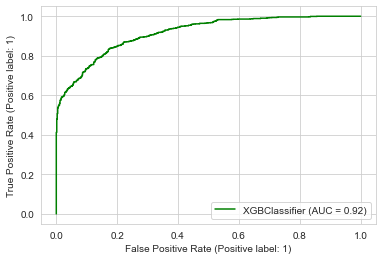

In [145]:
# Plotting auc_roc_curve
print(color('AUC_ROC_CURVE FOR FINAL CHOSEN XGBOOST MODEL...\n','green',attrs=['bold']))
metrics.plot_roc_curve(final_model,X_important_test, y_test,color='g')
plt.show()

CONFUSION MATRIX FOR FINAL CHOSEN XGBOOST MODEL...



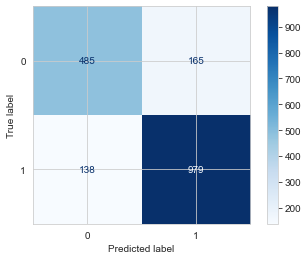

In [146]:
#plotting confusion matrix
print(color('CONFUSION MATRIX FOR FINAL CHOSEN XGBOOST MODEL...\n','green',attrs=['bold']))
metrics.plot_confusion_matrix(final_model,X_important_test, y_test,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

- The FN is 138 and FP is 165 . As we desired we wanted to keep these numbers as low as possible. 
- The auc_roc_curve also gave a good output
- In the classfication report , precison vs recall trade off has been quite good (for both classes, though recall for not survived could be imporved further )


In [147]:
## SAVING THE FINAL MODEL 
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(final_model, 'patient_survival.pkl') 
  


['patient_survival.pkl']

## USING THE MODEL TO PREDICT ON UNSEEN VALIDATION DATA 

- We need to process the validation data through the steps the training data went through and get ready for prediction by model

In [148]:
X_valid.shape,y_valid.shape

((3465, 18), (3465,))

### Step 1

In [149]:
#  drop Unnamed: 0 columns as it is same as index column
X_valid.drop('Unnamed: 0',axis=1,inplace=True)


### Step 2

In [150]:
#Impute outlier age values to max age and corresponding BMI to mean BMI for age=66
Age_out_valid = X_valid[X_valid['Patient_Age'] > (Q3 + 1.5 * IQR_age)] # columns with age values > (Q3 + 1.5 * IQR)
Age_out_valid

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
18630,33005,0,12506,NaN,125,1.2581,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [151]:
#assign age=66 and corresponding mean BMI to outliers
index_age_out_valid = list(Age_out_valid.index)
for index in index_age_out_valid:
    X_train['Patient_Age'][index] = 66
    X_train['Patient_Body_Mass_Index'][index] = age_66_meanBMI

### Step 3

In [152]:
X_valid.isnull().sum()

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             5
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            169
B                            169
C                            169
D                            169
E                            169
F                            169
Z                            169
Number_of_prev_cond          169
dtype: int64

In [153]:
# fill missing values of number of prev_cond
X_valid['Number_of_prev_cond'].fillna(median_prev_cond,inplace=True)

### Step 4

In [154]:
X_valid['Treated_with_drugs'].fillna(mode_drugs,inplace=True) #impute with mode values

### Step 5

In [155]:
#imputing A-z previous condition with A and E as 1.0 and balance =0.0
X_valid['A'].fillna(1.0,inplace=True)
X_valid['B'].fillna(0,inplace=True)
X_valid['C'].fillna(0,inplace=True)
X_valid['D'].fillna(0,inplace=True)
X_valid['E'].fillna(1.0,inplace=True)
X_valid['F'].fillna(0,inplace=True)
X_valid['Z'].fillna(0,inplace=True)

### Step 6

In [156]:
#dropping Patient_mental_condition column
X_valid.drop('Patient_mental_condition',axis=1,inplace=True)

### Step 7

In [157]:
drugs_valid = X_valid['Treated_with_drugs'].str.get_dummies(sep=' ')
drugs_valid.head()

,DX1,DX2,DX3,DX4,DX5,DX6
21109,0,0,0,0,0,1
596,0,0,1,0,1,0
5750,0,0,0,0,0,1
13110,0,1,0,0,0,0
3353,1,0,0,0,1,0


In [158]:
X_valid = pd.concat([X_valid,drugs_valid],axis=1)
# we can drop Treated_with_drugs column
X_valid.drop('Treated_with_drugs',axis=1,inplace=True)

### Step 8

In [159]:
#replace 'cannot say' in smoker column to No category
X_valid['Patient_Smoker'] = X_valid['Patient_Smoker'].replace({'Cannot say':'NO'})

### Step 9

In [160]:
#using one hot encoding to convert cat columns to numeric
X_valid = pd.get_dummies(X_valid,columns=['Patient_Smoker','Patient_Rural_Urban'])

### Step 10

In [161]:
#dropping 'ID_Patient_Care_Situation'
X_valid.drop('ID_Patient_Care_Situation',axis=1,inplace=True)

### Step 11

In [162]:
# Patient ID to cat column
X_valid['Patient_ID'] = X_train['Patient_ID'].astype('category')

### Step 12

In [163]:
# create a column no of treatment drugs which is sum of columns DX1..DX6 
X_valid['No_of_treatment_drugs'] = X_valid['DX1']+X_valid['DX2']+ X_valid['DX3']+X_valid['DX4']+X_valid['DX5']+X_valid['DX6']

In [164]:
# we fit Boruta method to select features prior 
X_important_valid = boruta_selector.transform(np.array(X_valid))

In [165]:
X_important_valid.shape

(3465, 21)

In [166]:
#converting valid numpy array to dataframe
X_important_valid = pd.DataFrame(X_important_valid, columns = X_imp_cols)

In [167]:
X_important_valid.head(2)

,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,Number_of_prev_cond,...,DX2,DX3,DX4,DX5,DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,No_of_treatment_drugs
0,23.0,NaN,26.0,29.957685,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,2.0,NaN,53.0,19.333621,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0


In [168]:
# Load the model from the file 
XGB_from_joblib = joblib.load('patient_survival.pkl')  
#XGB_from_joblib.fit(X_important_train,y_train) 
# Use the loaded model to make predictions 
y_pred_valid= XGB_from_joblib.predict(X_important_valid) 

In [169]:
#accuracy of model,f1 score ,auc_roc_score
print('Test Accuracy for Final XGB model on validation dataset',metrics.accuracy_score(y_valid,y_pred_valid))
print('F1 Score for Final XGB model on validation dataset',metrics.f1_score(y_valid,y_pred_valid))
print('Auc_Roc_score for finalXGB on validation dataset',metrics.roc_auc_score(y_valid,y_pred_valid))

Test Accuracy for Final XGB model on validation dataset 0.8354978354978355
F1 Score for Final XGB model on validation dataset 0.8710407239819006
Auc_Roc_score for finalXGB on validation dataset 0.8199878624342339


AUC_ROC_CURVE FOR VALIDATION DATASET MODEL...



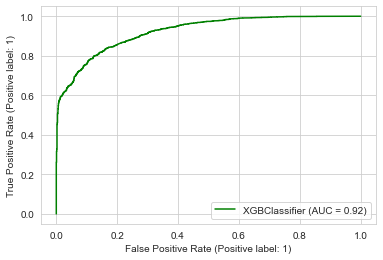

In [170]:
# Plotting auc_roc_curve
print(color('AUC_ROC_CURVE FOR VALIDATION DATASET MODEL...\n','green',attrs=['bold']))
metrics.plot_roc_curve(XGB_from_joblib,X_important_valid, y_valid,color='g')
plt.show()
plt.show()

CONFUSION MATRIX FOR FINAL VALIDATION SET...



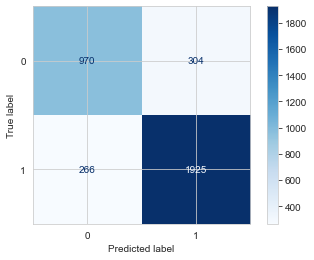

In [171]:
#plotting confusion matrix
print(color('CONFUSION MATRIX FOR FINAL VALIDATION SET...\n','green',attrs=['bold']))
metrics.plot_confusion_matrix(XGB_from_joblib,X_important_valid, y_valid,
                                 cmap=plt.cm.Blues)
                                 
plt.show()

In [172]:
# printing classification report
print(color('CLASSIFICATION REPORT FOR FINAL CHOSEN XGBOOST MODEL...\n','green',attrs=['bold']))
print(metrics.classification_report(y_valid,y_pred_valid))

CLASSIFICATION REPORT FOR FINAL CHOSEN XGBOOST MODEL...

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1274
           1       0.86      0.88      0.87      2191

    accuracy                           0.84      3465
   macro avg       0.82      0.82      0.82      3465
weighted avg       0.83      0.84      0.83      3465



##  Interpreting Machine Learning Models using SHAP

- ELI5 is an acronym for ‘Explain like I am a 5-year old’. Interpreting a machine learning model has two aspects to it:

-Global Interpretation:  at a global level how the model works
-Local Interpretation: Look at a single prediction and identify features leading to that prediction



In [173]:
import eli5
eli5.show_weights(final_model) # clf is the model fitted 

Weight,Feature
0.1574,DX6
0.1261,Patient_Smoker_NO
0.0617,DX5
0.0535,DX3
0.0531,D
0.0515,DX4
0.0496,Diagnosed_Condition
0.0481,Patient_Body_Mass_Index
0.0477,A
0.0457,Patient_Smoker_YES


In [175]:
# what were the attributes which contributed in model prediction for first row of validation dataset
eli5.show_prediction(final_model, X_important_valid.iloc[1])


### CREATE  A PREDICTION DATAFRAME WITH MODEL PREDICTED OUTPUTS

In [232]:
# taking out prediction and probability of prediction values for validation dataset
y_pred_valid = pd.Series(y_pred_valid)
y_pred_prob = list(XGB_from_joblib.predict_proba(X_important_valid)[:,1]) #sind predict_proba has two values we take 
#prob for predicting survived(=1)


In [233]:
# retriving the patient ID from orginal DF based on index values
test_index = list(X_valid.index) # index of valid dataset
Org_dataframe_index =[] 
Patient_ID = []
for index in test_index:
    Org_dataframe_index.append(index)
    Patient_ID.append(patient.loc[index]['Patient_ID']) # retriving patient ID and appending to list
    
Org_dataframe_index[:5],Patient_ID[:5]

([21109, 596, 5750, 13110, 3353], [1399, 3078, 10919, 10960, 3179])

In [259]:
#create a new dataframe 
cm = sns.light_palette("green", as_cmap=True)
y_true_valid = list(y_valid.values)
output_df = pd.DataFrame({'Original_DF_Index':Org_dataframe_index,'Patient_ID':Patient_ID,'True_Value(Survived_1_year)':y_true_valid})
output_df['model_prediction']= pd.Series(y_pred_valid)
output_df['Model_pred_probability_for_Survived'] = pd.Series(y_pred_prob)
s = output_df.head().style.background_gradient(cmap=cm)
print(color('Predictions for Validation Dataset by Final Model','blue',attrs=['bold']))
s

Predictions for Validation Dataset by Final Model


,Original_DF_Index,Patient_ID,True_Value(Survived_1_year),model_prediction,Model_pred_probability_for_Survived
0,21109,1399,0,0,0.012010
1,596,3078,1,1,0.999047
2,5750,10919,1,0,0.384766
3,13110,10960,0,0,0.072845
4,3353,3179,0,0,0.384953


  - Model prediction and probability ofprediction can be compared with true value in the dataframe
  - as seen the model got probability of survuval for Patient ID 1399 as 0.012, hence it the patient was classified as not_survived
  - while in case of Pateint ID 3078, the probablity of prediction was 0.999 , hence classified as Survived

### 3.4 Analysis 

Spend some time analysing your models, data and processes.

[Back to top](#Table-of-contents)

### 3.5 Results

What are your results?

[Back to top](#Table-of-contents)

## 4. Implementation (optional)

Ab attempt has been made as a part of deployment of model to create an App in streamlit to predict survived_1_year given attributes for a patient. The streamlit is a user friendly tool in python which has inbuilt method to design a webpage similar to html and css using Flask. The code caters for basic description of data along with description of features and plots . The App accepts user inputs for a patient and uses the saved model (patient_survival.pkl) to predict survived_1_year for the patient. To regulate the access of App a user name and password protection has been provided. The code has been written in VS code (newapp.py). 

[Back to top](#Table-of-contents)

## Conclusion

What are your conclusions?

[Back to top](#Table-of-contents)

## References

(1) https://www.foreseemed.com/blog/machine-learning-in-healthcare Benefits of Machine Learning in Healthcare

(2) https://www.kdnuggets.com/2020/11/predicting-heart-disease-machine-learning.html by Venkat Raman,Data Scientist at True  
    Influence

(3) https://machinelearningmastery.com/data-leakage-machine-learning/ Data Leakege in Machine Learning by Jason Brownlee

(4) https://github.com/scikit-learn-contrib/boruta_py GitHub repository for Boruta Feature Selection method

(5) https://www.analyticsvidhya.com/blog/2020/03/6-python-libraries-interpret-machine-learning-models/ The Case for Building Trust in Machine Learning Models by Purva

(6) https://www.analyticsvidhya.com/blog/2020/12/deploying-machine-learning-models-using-streamlit-an-introductory-guide-to-model-deployment/ Deploying machine learning models using Streamlit – An introductory guide to Model Deployment

(7) https://towardsdatascience.com/streamlit-101-an-in-depth-introduction-fc8aad9492f2  Streamlit 101: An in-depth introduction

[Back to top](#Table-of-contents)

In [249]:
X_valid.loc[21109]

Diagnosed_Condition          23.000000
Patient_ID                         NaN
Patient_Age                  26.000000
Patient_Body_Mass_Index      29.957685
A                             1.000000
B                             0.000000
C                             0.000000
D                             0.000000
E                             0.000000
F                             0.000000
Z                             0.000000
Number_of_prev_cond           1.000000
DX1                           0.000000
DX2                           0.000000
DX3                           0.000000
DX4                           0.000000
DX5                           0.000000
DX6                           1.000000
Patient_Smoker_NO             0.000000
Patient_Smoker_YES            1.000000
Patient_Rural_Urban_RURAL     1.000000
Patient_Rural_Urban_URBAN     0.000000
No_of_treatment_drugs         1.000000
Name: 21109, dtype: float64

In [251]:
X_important_valid.columns

Index(['Diagnosed_Condition', 'Patient_ID', 'Patient_Age',
       'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E',
       'Number_of_prev_cond', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'No_of_treatment_drugs'],
      dtype='object')